---

### Lista de encabezados

1. Piezas del Vehículo:
        1: "Antiniebla delantero derecho",
        2: "Antiniebla delantero izquierdo",
        3: "Capó",
        4: "Cerradura capo",
        5: "Cerradura maletero",
        6: "Cerradura puerta",
        7: "Espejo lateral derecho",
        8: "Espejo lateral izquierdo",
        9: "Faros derecho",
        10: "Faros izquierdo",
        11: "Guardabarros delantero derecho",
        12: "Guardabarros delantero izquierdo",
        13: "Guardabarros trasero derecho",
        14: "Guardabarros trasero izquierdo",
        15: "Luz indicadora delantera derecha",
        16: "Luz indicadora delantera izquierda",
        17: "Luz indicadora trasera derecha",
        18: "Luz indicadora trasera izquierda",
        19: "Luz trasera derecho",
        20: "Luz trasera izquierdo",
        21: "Maletero",
        22: "Manija derecha",
        23: "Manija izquierda",
        24: "Marco de la ventana",
        25: "Marco de las puertas",
        26: "Moldura capó",
        27: "Moldura puerta delantera derecha",
        28: "Moldura puerta delantera izquierda",
        29: "Moldura puerta trasera derecha",
        30: "Moldura puerta trasera izquierda",
        31: "Parabrisas delantero",
        32: "Parabrisas trasero",
        33: "Parachoques delantero",
        34: "Parachoques trasero",
        35: "Puerta delantera derecha",
        36: "Puerta delantera izquierda",
        37: "Puerta trasera derecha",
        38: "Puerta trasera izquierda",
        39: "Rejilla, parrilla",
        40: "Rueda",
        41: "Tapa de combustible",
        42: "Tapa de rueda",
        43: "Techo",
        44: "Techo corredizo",
        45: "Ventana delantera derecha",
        46: "Ventana delantera izquierda",
        47: "Ventana trasera derecha",
        48: "Ventana trasera izquierda",
        49: "Ventanilla delantera derecha",
        50: "Ventanilla delantera izquierda",
        51: "Ventanilla trasera derecha",
        52: "Ventanilla trasera izquierda"

2. Tipos de Daño:
        1: "Abolladura",
        2: "Deformación",
        3: "Desprendimiento",
        4: "Fractura",
        5: "Rayón",
        6: "Rotura"

3. Sugerencia:
        1:"Reparar", 
        2:"Reemplazar"

# Librerias necesarias:

    !pip install pandas
    !pip install scikit-learn
    !pip install matplotlib
    !pip install seaborn
    !pip install torch torchvision torchaudio
    !pip install tensorboard
    !pip install imblearn
    !pip install smote-variants
    !SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True pip install smote-variants
    !pip install scikit-multilearn
    !pip install liac-arff
    !pip install requests


In [1]:
import pandas as pd
import numpy as np
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter
from imblearn.over_sampling import SMOTE
import logging

In [ ]:
# Diccionarios completos: Todos los mapeos completos para piezas, daños y sugerencias.
label_to_cls_piezas = {
    1: "Antiniebla delantero derecho",
    2: "Antiniebla delantero izquierdo",
    3: "Capó",
    4: "Cerradura capo",
    5: "Cerradura maletero",
    6: "Cerradura puerta",
    7: "Espejo lateral derecho",
    8: "Espejo lateral izquierdo",
    9: "Faros derecho",
    10: "Faros izquierdo",
    11: "Guardabarros delantero derecho",
    12: "Guardabarros delantero izquierdo",
    13: "Guardabarros trasero derecho",
    14: "Guardabarros trasero izquierdo",
    15: "Luz indicadora delantera derecha",
    16: "Luz indicadora delantera izquierda",
    17: "Luz indicadora trasera derecha",
    18: "Luz indicadora trasera izquierda",
    19: "Luz trasera derecho",
    20: "Luz trasera izquierdo",
    21: "Maletero",
    22: "Manija derecha",
    23: "Manija izquierda",
    24: "Marco de la ventana",
    25: "Marco de las puertas",
    26: "Moldura capó",
    27: "Moldura puerta delantera derecha",
    28: "Moldura puerta delantera izquierda",
    29: "Moldura puerta trasera derecha",
    30: "Moldura puerta trasera izquierda",
    31: "Parabrisas delantero",
    32: "Parabrisas trasero",
    33: "Parachoques delantero",
    34: "Parachoques trasero",
    35: "Puerta delantera derecha",
    36: "Puerta delantera izquierda",
    37: "Puerta trasera derecha",
    38: "Puerta trasera izquierda",
    39: "Rejilla, parrilla",
    40: "Rueda",
    41: "Tapa de combustible",
    42: "Tapa de rueda",
    43: "Techo",
    44: "Techo corredizo",
    45: "Ventana delantera derecha",
    46: "Ventana delantera izquierda",
    47: "Ventana trasera derecha",
    48: "Ventana trasera izquierda",
    49: "Ventanilla delantera derecha",
    50: "Ventanilla delantera izquierda",
    51: "Ventanilla trasera derecha",
    52: "Ventanilla trasera izquierda"
}

label_to_cls_danos = {
    1: "Abolladura",
    2: "Deformación",
    3: "Desprendimiento",
    4: "Fractura",
    5: "Rayón",
    6: "Rotura"
}

label_to_cls_sugerencia = {
    1: "Reparar",
    2: "Reemplazar"
}

In [ ]:
cls_to_label_piezas = {v.lower().strip(): k for k, v in label_to_cls_piezas.items()}
cls_to_label_danos = {v.lower().strip(): k for k, v in label_to_cls_danos.items()}
cls_to_label_sugerencia = {v.lower().strip(): k for k, v in label_to_cls_sugerencia.items()}

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

- Limpieza de texto (minúsculas, eliminar espacios)
- Manejo de valores compuestos (ej. "Abolladura-dent")
- Manejo de errores y valores no encontrados

In [ ]:
# Data preparation: reading and encoding
df = pd.read_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145.csv', sep='|')

def limpiar_texto(texto):
    """Limpia y estandariza el texto para comparación"""
    if pd.isna(texto):
        return ""
    return texto.lower().strip()

def procesar_dano(texto):
    """Procesa la columna Tipos de Daño (maneja casos como 'Abolladura-dent')"""
    texto = limpiar_texto(texto)
    if '-' in texto:
        return texto.split('-')[0]
    return texto

def mapear_valor(texto, diccionario, columna):
    """Mapea texto a valor numérico con manejo de errores"""
    try:
        texto = limpiar_texto(texto)
        if columna == 'Tipos de Daño':
            texto = procesar_dano(texto)
        return diccionario.get(texto, -1)   # -1 para valores no encontrados
    except Exception as e:
        logger.error(f"Error procesando valor: {texto} - {str(e)}")
        return -1

# Apply mappings
df['Tipos de Daño_encoded'] = df['Tipos de Daño'].apply(lambda x: mapear_valor(x, cls_to_label_danos, 'Tipos de Daño'))
df['Piezas del Vehículo_encoded'] = df['Piezas del Vehículo'].apply(lambda x: mapear_valor(x, cls_to_label_piezas, 'Piezas del Vehículo'))
df['Sugerencia_encoded'] = df['Sugerencia'].apply(lambda x: mapear_valor(x, cls_to_label_sugerencia, 'Sugerencia'))

In [13]:
df.head()

,Imagen,Tipos de Daño,Piezas del Vehículo,Sugerencia,Tipos de Daño_encoded,Piezas del Vehículo_encoded,Sugerencia_encoded
0,1.jpg,Abolladura,Guardabarros delantero derecho,Reparar,1,11,1
1,2.jpg,Abolladura,Parachoques trasero,Reparar,1,34,1
2,3.jpg,Rayón,Parachoques delantero,Reparar,5,33,1
3,4.jpg,Rotura,Rueda,Reparar,6,40,1
4,5.jpg,Rotura,Parabrisas trasero,Reemplazar,6,32,2


Consolida las etiquetas y genera el encode.

        Imagen	dannos	partes	sugerencias
    0	1.jpg	[1]	[11]	[1]
    1	10.jpg	[6]	[31]	[2]
    2	100.jpg	[2, 6, 6]	[11, 9, 33]	[1, 2, 1]
    3	1000.jpg	[5]	[33]	[1]
    4	1001.jpg	[1, 4, 6]	[21, 34, 20]	[1, 1, 2]

In [ ]:
# Consolidate labels by image
def consolidar_etiquetas(group):
    result = {'dannos': [], 'partes': [], 'sugerencias': []}
    for col in result.keys():
        unique_values = group[col].dropna()
        result[col] = unique_values.tolist()
    return pd.Series(result)

df_encoded = df.rename(columns={
    'Tipos de Daño_encoded': 'dannos',
    'Piezas del Vehículo_encoded': 'partes',
    'Sugerencia_encoded': 'sugerencias'
})

df_consolidado_encoded = df_encoded.groupby('Imagen', group_keys=False)[['dannos', 'partes', 'sugerencias']].apply(consolidar_etiquetas).reset_index()

def convert_string_lists(df):
    for col in ['dannos', 'partes', 'sugerencias']:
        if df[col].dtype == object and isinstance(df[col].iloc[0], str):
            df[col] = df[col].apply(ast.literal_eval)
    return df

multi_consolidado_encoded = convert_string_lists(df_consolidado_encoded)

# Guardar el nuevo archivo CSV
df_consolidado_encoded.to_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_V6_1145_etiquetas_encoded.csv', index=False, sep='|')

In [15]:
multi_consolidado_encoded.head(15)

,Imagen,dannos,partes,sugerencias
0,1.jpg,[1],[11],[1]
1,10.jpg,[6],[31],[2]
2,100.jpg,"[2, 6, 6]","[11, 9, 33]","[1, 2, 1]"
3,1000.jpg,[5],[33],[1]
4,1001.jpg,"[1, 4, 6]","[21, 34, 20]","[1, 1, 2]"
5,1002.jpg,[1],[11],[1]
6,1003.jpg,"[3, 5]","[33, 9]","[2, 2]"
7,1004.jpg,"[4, 5]","[19, 34]","[2, 1]"
8,1005.jpg,[1],[34],[1]
9,1006.jpg,[5],[13],[1]


Guarda el archivo agrupados por etiquetas

    Imagen|Tipos de Daño|Piezas del Vehículo|Sugerencia
    1.jpg|['Abolladura']|['Guardabarros delantero derecho ']|['Reparar']
    10.jpg|['Rotura']|['Parabrisas delantero']|['Reemplazar']
    100.jpg|['Deformación', 'Rotura', 'Rotura']|['Guardabarros delantero derecho ', 'Faros derecho', 'Parachoques delantero']|['Reparar', 'Reemplazar', 'Reparar']
    1000.jpg|['Rayón']|['Parachoques delantero']|['Reparar']
    1001.jpg|['Abolladura', 'Fractura', 'Rotura']|['Maletero', 'Parachoques trasero', 'Luz trasera izquierdo']|['Reparar', 'Reparar', 'Reemplazar']
    1002.jpg|['Abolladura']|['Guardabarros delantero derecho ']|['Reparar']
    1003.jpg|['Desprendimiento', 'Rayón']|['Parachoques delantero', 'Faros derecho']|['Reemplazar', 'Reemplazar']
    1004.jpg|['Fractura', 'Rayón']|['Luz trasera derecho', 'Parachoques trasero']|['Reemplazar', 'Reparar']


In [29]:
# Agrupamos por imagen y consolidamos las etiquetas
def consolidar_etiquetas(group):
    result = {
        'Tipos de Daño': [],
        'Piezas del Vehículo': [],
        'Sugerencia': []
    }
    
    for col in result.keys():
        ## unique_values = group[col].dropna().unique()
        unique_values = group[col].dropna()
        result[col] = unique_values.tolist()
    
    return pd.Series(result)

df_consolidado_etiquetas = (
    df.groupby('Imagen', group_keys=False)
    [['Tipos de Daño', 'Piezas del Vehículo', 'Sugerencia']]  # Selección explícita de columnas
    .apply(consolidar_etiquetas)
    .reset_index()
)
# Guardar el nuevo archivo CSV
df_consolidado_etiquetas.to_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_V6_1145_etiquetas.csv', index=False, sep='|')

---
Opcional

In [17]:
# Antes de crear el Dataset, verifica datos inconsistentes
def check_data_consistency(df):
    # Verificar partes no definidas
    undefined_parts = set()
    for parts_list in df['partes']:
        for part in parts_list:
            if part not in cls_to_label_piezas:
                undefined_parts.add(part)
    
    # Verificar daños no definidos
    undefined_damages = set()
    for damages_list in df['dannos']:
        for damage in damages_list:
            if damage not in cls_to_label_danos:
                undefined_damages.add(damage)
    
    # Verificar sugerencias no definidas
    undefined_suggestions = set()
    for suggestions_list in df['sugerencias']:
        for sug in suggestions_list:
            if sug not in cls_to_label_sugerencia:
                undefined_suggestions.add(sug)
    
    print("\nPartes no definidas encontradas:", undefined_parts)
    print("Daños no definidos encontrados:", undefined_damages)
    print("Sugerencias no definidas encontradas:", undefined_suggestions)

In [18]:
check_data_consistency(df_consolidado_encoded)


Partes no definidas encontradas: {1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 45, 46, 47, 48, 50, 51, 52}
Daños no definidos encontrados: {1, 2, 3, 4, 5, 6}
Sugerencias no definidas encontradas: {1, 2}


---

In [19]:
# MultiLabelBinarizer encoding
mlb_parts = MultiLabelBinarizer(classes=sorted(cls_to_label_piezas.values()))
mlb_dannos = MultiLabelBinarizer(classes=sorted(cls_to_label_danos.values()))
mlb_sugerencias = MultiLabelBinarizer(classes=sorted(cls_to_label_sugerencia.values()))

parts_binary = mlb_parts.fit_transform(multi_consolidado_encoded['partes'])
dannos_binary = mlb_dannos.fit_transform(multi_consolidado_encoded['dannos'])
sugerencias_binary = mlb_sugerencias.fit_transform(multi_consolidado_encoded['sugerencias'])

combined_labels = np.hstack([parts_binary, dannos_binary, sugerencias_binary])

In [26]:
print(mlb_parts)
print(mlb_dannos)
print(mlb_sugerencias)

print(combined_labels)

MultiLabelBinarizer(classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                             16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
                             29, 30, ...])
MultiLabelBinarizer(classes=[1, 2, 3, 4, 5, 6])
MultiLabelBinarizer(classes=[1, 2])
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]


---
Opcional

Buscar etiquetas con menos de 10 ejemplos

In [27]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

def analyze_multilabel_class_distribution(y, class_names=None):
    """
    Analyze and plot the distribution of classes in a multi-label binary matrix.
    y: numpy array of shape (n_samples, n_classes)
    class_names: list of class names corresponding to columns in y
    """
    # Sum occurrences of each class
    class_counts = np.sum(y, axis=0)
    if class_names is None:
        class_names = [f"Class_{i}" for i in range(y.shape[1])]

    # Create a sorted list of (class_name, count)
    sorted_counts = sorted(zip(class_names, class_counts), key=lambda x: x[1])

    # Print classes with low counts
    print("Classes with low sample counts:")
    for cls, count in sorted_counts:
        if count < 10:  # Threshold for rarity, adjust as needed
            print(f"{cls}: {count} samples")

    # Plot distribution
    plt.figure(figsize=(12, 6))
    plt.bar([cls for cls, _ in sorted_counts], [count for _, count in sorted_counts])
    plt.xticks(rotation=90)
    plt.title("Multi-label Class Distribution")
    plt.ylabel("Number of Samples")
    plt.tight_layout()
    plt.show()

Classes with low sample counts:
17: 1 samples
18: 1 samples
22: 1 samples
29: 1 samples
50: 1 samples
30: 2 samples
51: 2 samples
28: 3 samples
23: 4 samples
27: 4 samples
45: 4 samples
48: 4 samples
1: 5 samples
8: 5 samples
24: 5 samples
46: 5 samples
7: 6 samples
16: 6 samples
43: 6 samples
47: 6 samples
52: 6 samples
2: 7 samples
15: 9 samples


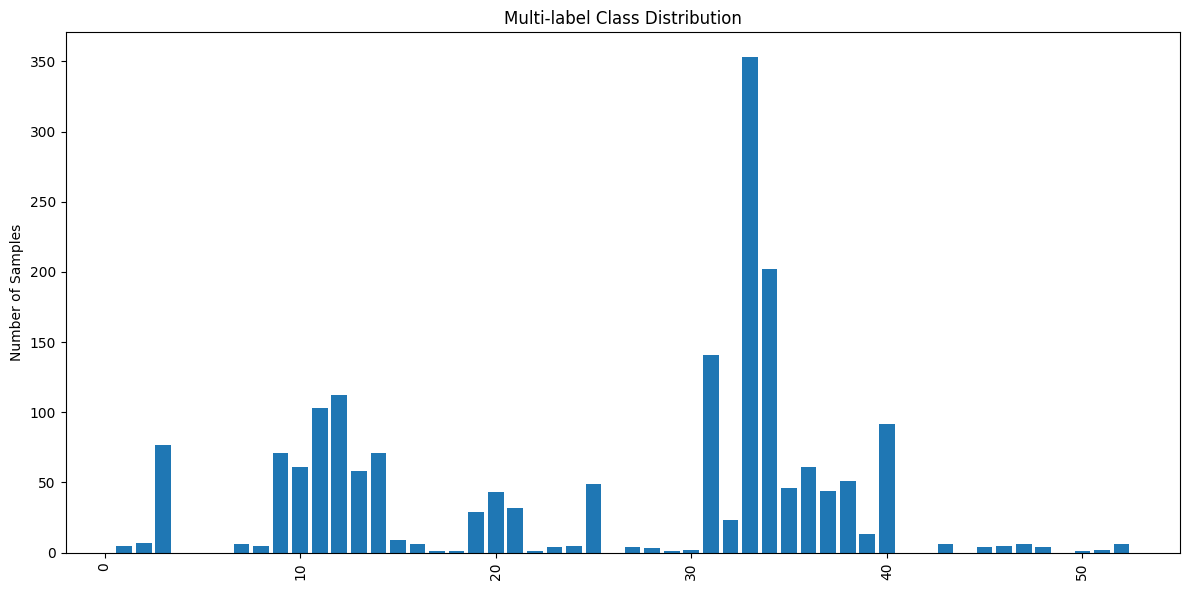

In [28]:
# Assuming your label data is in multi_consolidado_encoded['partes'] or similar
mlb = MultiLabelBinarizer()
combined_labels = mlb.fit_transform(multi_consolidado_encoded['partes'])  # or your combined multi-label matrix

analyze_multilabel_class_distribution(combined_labels, class_names=mlb.classes_)

Se necesitan mas images con las siguientes clases:

    17: Luz indicadora trasera derecha
    18: Luz indicadora trasera izquierda
    22: Manija derecha
    29: Moldura puerta trasera derecha
    50: Ventanilla delantera izquierda
    30: Moldura puerta trasera izquierda
    51: Ventanilla trasera derecha
    28: Moldura puerta delantera izquierda
    23: Manija izquierda
    27: Moldura puerta delantera derecha
    45: Ventana delantera derecha
    48: Ventana trasera izquierda
    1: Antiniebla delantero derecho
    8: Espejo lateral izquierdo
    24: Marco de la ventana
    46: Ventana delantera izquierda
    7: Espejo lateral derecho
    16: Luz indicadora delantera izquierda
    43: Techo
    47: Ventana trasera derecha
    52: Ventanilla trasera izquierda
    2: Antiniebla delantero izquierdo
    15: Luz indicadora delantera derecha

- At least 20-30 samples per class for simple models or initial experiments.
- 50-100 samples per class for more robust training and better generalization.
- More samples are always better, especially for deep learning models.

---

Se agrupan las etiquetas raras, las que tienen menos de 10 imagenes para evaluar y aprender

In [8]:
# Detect rare classes dynamically
def detect_rare_classes(y, threshold=10):
    class_counts = np.sum(y, axis=0)
    rare_classes = [i for i, count in enumerate(class_counts) if count < threshold]
    logger.info(f"Detected {len(rare_classes)} rare classes with less than {threshold} samples.")
    return rare_classes

rare_class_indices = detect_rare_classes(combined_labels, threshold=10)

# Add "otros" class column
otros_column = np.zeros((combined_labels.shape[0], 1), dtype=int)
combined_labels_extended = np.hstack([combined_labels, otros_column])
group_index = combined_labels_extended.shape[1] - 1

# Group rare classes
def group_rare_classes(y, rare_class_indices, group_index):
    y_grouped = y.copy()
    rare_mask = np.any(y[:, rare_class_indices] == 1, axis=1)
    y_grouped[:, rare_class_indices] = 0
    y_grouped[rare_mask, group_index] = 1
    logger.info(f"Grouped rare classes into index {group_index}.")
    return y_grouped

filtered_rare_class_indices = [i for i in rare_class_indices if i < combined_labels_extended.shape[1]]
combined_labels_grouped = group_rare_classes(combined_labels_extended, filtered_rare_class_indices, group_index)

INFO:__main__:Detected 23 rare classes with less than 10 samples.
INFO:__main__:Grouped rare classes into index 44.


In [9]:
# Placeholder features (replace with real embeddings)
X_placeholder = np.arange(len(multi_consolidado_encoded)).reshape(-1, 1)

# Oversampling function (from your custom code)
def multilabel_to_singlelabel(y):
    label_strings = [''.join(map(str, row)) for row in y]
    unique_labels = list(set(label_strings))
    label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
    y_single = np.array([label_to_int[label] for label in label_strings])
    return y_single, label_to_int

def singlelabel_to_multilabel(y_single, label_to_int):
    int_to_label = {v: k for k, v in label_to_int.items()}
    y_multi = []
    for label_int in y_single:
        label_str = int_to_label[label_int]
        y_multi.append([int(ch) for ch in label_str])
    return np.array(y_multi)

def filter_small_classes(X, y, min_samples=2):
    """
    Remove samples belonging to classes with fewer than min_samples.
    Returns filtered X and y.
    """
    y_single, label_to_int = multilabel_to_singlelabel(y)
    class_counts = Counter(y_single)
    valid_classes = {cls for cls, count in class_counts.items() if count >= min_samples}
    valid_indices = [i for i, cls in enumerate(y_single) if cls in valid_classes]
    if len(valid_indices) < len(y_single):
        print(f"Filtered out {len(y_single) - len(valid_indices)} samples from classes with fewer than {min_samples} samples.")
    return X[valid_indices], y[valid_indices]

def apply_multilabel_oversampling(X, y, method='SMOTE', k_neighbors=3):
    # Filter samples from very small classes before oversampling
    X_filtered, y_filtered = filter_small_classes(X, y, min_samples=k_neighbors+1)
    if len(X_filtered) == 0:
        raise ValueError("No samples left after filtering small classes. Oversampling cannot proceed.")
    y_single, label_to_int = multilabel_to_singlelabel(y_filtered)
    class_counts = Counter(y_single)
    min_class_samples = min(class_counts.values())
    adjusted_k = min(k_neighbors, min_class_samples - 1) if min_class_samples > 1 else 1

    if method == 'SMOTE':
        sampler = SMOTE(k_neighbors=adjusted_k, random_state=42)
    elif method == 'ADASYN':
        sampler = ADASYN(n_neighbors=adjusted_k, random_state=42)
    else:
        raise ValueError("Unsupported method. Choose 'SMOTE' or 'ADASYN'.")

    X_resampled, y_single_resampled = sampler.fit_resample(X_filtered, y_single)
    y_resampled = singlelabel_to_multilabel(y_single_resampled, label_to_int)
    print(f"Oversampling completed. Original samples: {len(X)}, Filtered samples: {len(X_filtered)}, Resampled samples: {len(X_resampled)}")
    return X_resampled, y_resampled

# Apply oversampling
X_resampled, y_resampled = apply_multilabel_oversampling(X_placeholder, combined_labels_grouped, method='SMOTE', k_neighbors=3)

# Reconstruct DataFrame with oversampled labels
num_parts = parts_binary.shape[1]
num_dannos = dannos_binary.shape[1]
num_sugerencias = sugerencias_binary.shape[1]

parts_resampled = y_resampled[:, :num_parts]
dannos_resampled = y_resampled[:, num_parts:num_parts+num_dannos]
sugerencias_resampled = y_resampled[:, num_parts+num_dannos:]

def binary_to_label_list(binary_matrix, classes):
    label_lists = []
    for row in binary_matrix:
        labels = [classes[i] for i, val in enumerate(row) if val == 1 and i < len(classes)]
        label_lists.append(labels)
    return label_lists

parts_labels_resampled = binary_to_label_list(parts_resampled, mlb_parts.classes_)
dannos_labels_resampled = binary_to_label_list(dannos_resampled, mlb_dannos.classes_)
sugerencias_labels_resampled = binary_to_label_list(sugerencias_resampled, mlb_sugerencias.classes_)

df_oversampled = pd.DataFrame({
    'Imagen': [f"resampled_{i}" for i in range(len(X_resampled))],
    'partes': parts_labels_resampled,
    'dannos': dannos_labels_resampled,
    'sugerencias': sugerencias_labels_resampled
})

# Convert numpy int64 to int in lists for clean CSV
def convert_np_int64_to_int(lst):
    return [int(x) for x in lst]

for col in ['partes', 'dannos', 'sugerencias']:
    df_oversampled[col] = df_oversampled[col].apply(convert_np_int64_to_int)

Filtered out 154 samples from classes with fewer than 4 samples.
Oversampling completed. Original samples: 1145, Filtered samples: 991, Resampled samples: 8950


In [30]:
# Save dataframes to CSV
df.to_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_V6_1145_etiquetas.csv', index=False)
## df_consolidado_encoded.to_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_V6_1145_encoded.csv', index=False)

# Save combined labels with prefixed columns
parts_df = pd.DataFrame(parts_binary, columns=[f"partes_{cls}" for cls in mlb_parts.classes_])
dannos_df = pd.DataFrame(dannos_binary, columns=[f"dannos_{cls}" for cls in mlb_dannos.classes_])
sugerencias_df = pd.DataFrame(sugerencias_binary, columns=[f"sugerencias_{cls}" for cls in mlb_sugerencias.classes_])
combined_labels_df = pd.concat([parts_df, dannos_df, sugerencias_df], axis=1)
combined_labels_df.to_csv('data/fotos_siniestros/combined_labels_V6.csv', index=False)

## df_oversampled.to_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_V6_1145_etiquetas_encoded.csv', index=False)

logger.info(f"Original dataset size: {len(multi_consolidado_encoded)}")
logger.info(f"Oversampled dataset size: {len(df_oversampled)}")

INFO:__main__:Original dataset size: 1145
INFO:__main__:Oversampled dataset size: 8950


---